In [1]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import csv
import seaborn as sns
from collections import Counter

import statistics as stats

from numpy.random import seed

import seaborn as sns; sns.set()

import os

import warnings

In [2]:
#Store CSV into Dataframe

df = "./Resources/train_df.csv"
train_df = pd.read_csv(df,encoding='latin-1')
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
476,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
477,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
478,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#Store CSV into Dataframe

df2 = "./Resources/finaltest_df.csv"
test_df = pd.read_csv(df2,encoding='latin-1')
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
4,LP001054,Male,Yes,0.0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
284,LP002969,Male,Yes,1.0,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
285,LP002971,Male,Yes,3.0,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
286,LP002975,Male,Yes,0.0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
287,LP002986,Male,Yes,0.0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [4]:
#lets convert the remaining metrics that are strings to numeric values so we can run our models
Gender = {'Male':0, 'Female':1}
train_df.Gender=[Gender[item] for item in train_df.Gender]

Married = {'No':0, 'Yes':1}
train_df.Married=[Married[item] for item in train_df.Married]

Education = {'Not Graduate':0, 'Graduate':1}
train_df.Education=[Education[item] for item in train_df.Education]

Self_Employed = {'No':0, 'Yes':1}
train_df.Self_Employed=[Self_Employed[item] for item in train_df.Self_Employed]

Property_Area = {'Rural':0, 'Semiurban':1, 'Urban':2 }
train_df.Property_Area=[Property_Area[item] for item in train_df.Property_Area]

Loan_Status = {'N':0, 'Y':1}
train_df.Loan_Status=[Loan_Status[item] for item in train_df.Loan_Status]



Gender = {'Male':0, 'Female':1}
test_df.Gender=[Gender[item] for item in test_df.Gender]

Married = {'No':0, 'Yes':1}
test_df.Married=[Married[item] for item in test_df.Married]

Education = {'Not Graduate':0, 'Graduate':1}
test_df.Education=[Education[item] for item in test_df.Education]

Self_Employed = {'No':0, 'Yes':1}
test_df.Self_Employed=[Self_Employed[item] for item in test_df.Self_Employed]

Property_Area = {'Rural':0, 'Semiurban':1, 'Urban':2 }
test_df.Property_Area=[Property_Area[item] for item in test_df.Property_Area]



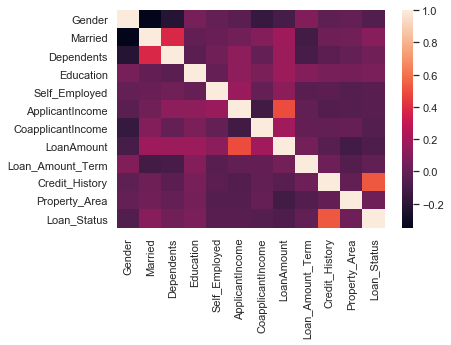

In [6]:
#checking for multicollinearity
corr = train_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.autoscale()

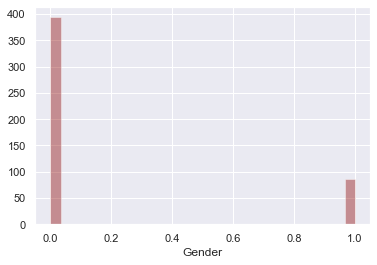

In [5]:
#Now that our values are numeric, lets use a histogram visualization to understand if this variable in our model is now evenly distributed after our changes to the data set based on our assumption
sns.distplot(train_df['Gender'],kde=False,color='darkred',bins=30)

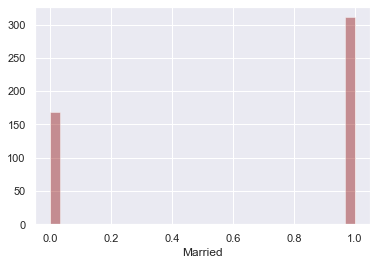

In [7]:
#Now that our values are numeric, lets use a histogram visualization to understand if this variable in our model is now evenly distributed after our changes to the data set based on our assumption
sns.distplot(train_df['Married'],kde=False,color='darkred',bins=30)

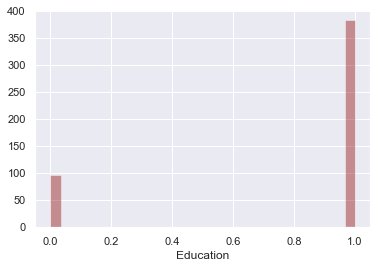

In [8]:
#Now that our values are numeric, lets use a histogram visualization to understand if this variable in our model is now evenly distributed after our changes to the data set based on our assumption
sns.distplot(train_df['Education'],kde=False,color='darkred',bins=30)